In [58]:
# импортируем нужные нам библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [61]:
# уберём id, потому что нам он не понадобится для обучения модели

df_for_training = df.drop(columns='id')
df_for_training.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [62]:
# просто избавимся от NaN, заменим в категориальных признаках эти значения на unknown
# а NaN-ы в числовых признаках заменим на средние

categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numeric_features = [col for col in df_for_training.columns if col not in categorical_features and col != 'satisfaction']

df_for_training[categorical_features] = df_for_training[categorical_features].fillna('unknown')

mean_values = df_for_training[numeric_features].mean()
df_for_training[numeric_features] = df_for_training[numeric_features].fillna(mean_values)    



In [63]:
# посмотрим, есть ли у нас какая-то зависимость между
# полом и удовлетворённостью полётом

# перед этим посмотрим, что лежит в столбце целевой переменной
# (можно было не указывать dropna=False, но на всякий)
df['satisfaction'].value_counts(dropna=False, normalize=True)

satisfaction
neutral or dissatisfied    0.453334
satisfied                  0.346666
-                          0.200000
Name: proportion, dtype: float64

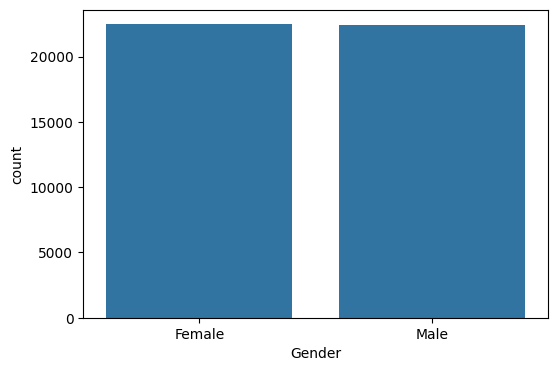

In [64]:
# видим, что есть какая-то черта, имеющаяся у !!!!!20%!!!!!!
# слишком много, заменять на какое-то значение не круто
# поэтому пока отложим эту проблему, решим её чуть позже

# построим графики
plt.figure(figsize=(6, 4))
# так как столбик содержит ещё 3-е значение, просто посмотрим
# какие части составляют мужчины и женщины среди удовлетворенных людей
sns.countplot(x='Gender', data=df[df['satisfaction'] == 'satisfied'])
plt.show()

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
    ('scaling', MinMaxScaler(), numeric_features)
])

df_for_training = column_transformer.fit_transform(df_for_training)

In [66]:
# восстанавливаем вид датафрейма, для этого нужны названия новых столбцов
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

df_for_training = pd.DataFrame(df_for_training, columns=lst)

In [67]:
df_for_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender_Male                        129880 non-null  float64
 1   Gender_unknown                     129880 non-null  float64
 2   Customer Type_disloyal Customer    129880 non-null  float64
 3   Customer Type_unknown              129880 non-null  float64
 4   Type of Travel_Personal Travel     129880 non-null  float64
 5   Type of Travel_unknown             129880 non-null  float64
 6   Class_Eco                          129880 non-null  float64
 7   Class_Eco Plus                     129880 non-null  float64
 8   Class_unknown                      129880 non-null  float64
 9   Age                                129880 non-null  float64
 10  Flight Distance                    129880 non-null  float64
 11  Departure Delay in Minutes         1298

In [68]:
# теперь после заполнения всех признаков мы можем построить модель,
# которая заполнит пропуски в столбце целевой переменной

# отобразим удовлетворённость клиентов в два числа
df_for_training['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied' : 1, 'satisfied' : 0})

In [69]:
# обучим модель на данных строчках, в которых известен последний столбец

df_without_missings = df_for_training[df_for_training['satisfaction'] != '-']

# чтобы обучить модель, нужно привести целевую переменную к int

df_without_missings['satisfaction'] = df_without_missings['satisfaction'].astype('int64')

C:\Users\Turalchik\AppData\Local\Temp\ipykernel_5956\2138523223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_missings['satisfaction'] = df_without_missings['satisfaction'].astype('int64')


In [70]:
# будем обучать вспомогательную модель на всех имеющихся данных без пропусков

X = df_without_missings.drop(columns=['satisfaction'])
y = df_without_missings['satisfaction']

In [71]:
# теперь наконец можно обучить модель, чтобы заполнить пропуски в данных

from sklearn.linear_model import LogisticRegression

auxiliary_model = LogisticRegression()

auxiliary_model.fit(X, y)

LogisticRegression()

In [72]:
# предскажем все значения, но возьём только соответствующие пропущенным значениям

X = df_for_training.drop(columns=['satisfaction'])
y = df_for_training['satisfaction']

pred_for_filling = auxiliary_model.predict(X)

In [73]:
# везде, где есть "-", заменяем их на соответствующие значения из выхода модели

condition = df_for_training['satisfaction'] == '-'

df_for_training.loc[condition, 'satisfaction'] = pred_for_filling[condition]

In [74]:
# теперь мы можем привести последний столбец к int

df_for_training['satisfaction'] = df_for_training['satisfaction'].astype('int64')

In [75]:
# теперь можем обучить нашу основную модель, которая будет предсказывать, будет доволен клиент или нет

from sklearn.model_selection import train_test_split

X = df_for_training.drop(columns=['satisfaction'])
y = df_for_training['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [76]:
main_model = LogisticRegression()

main_model.fit(X_train, y_train)

main_pred = main_model.predict(X_test)

In [77]:
# проводим оценку качества нашей модели

from sklearn.metrics import accuracy_score

accuracy_score(y_test, main_pred)

0.8974437942716353

In [78]:
# теперь посмотрим, какую бы мы получили модель,
# если бы просто выкинули те 20% "нехороших" данных

X = df_without_missings.drop(columns=['satisfaction'])
y = df_without_missings['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [79]:
model_without_predicted_data = LogisticRegression()

model_without_predicted_data.fit(X_train, y_train)

pred_without_predicted_data = model_without_predicted_data.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_without_predicted_data)

0.8742685555897752

In [81]:
X = df_for_training.drop(columns=['satisfaction'])
y = df_for_training['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [82]:
main_model.coef_, main_model.intercept_

(array([[-4.16777978e-02,  1.50605345e-02,  2.17244419e+00,
          1.31685811e+00,  2.95206466e+00,  1.22384928e+00,
          8.30542910e-01,  9.35651301e-01,  3.70487825e-01,
          2.49813051e+00, -2.33473349e-01,  8.18522172e-01,
          1.51523554e+00, -1.52196633e+01,  5.61104086e+00,
          2.14310551e+00,  4.81600492e-01, -1.73719718e-02,
         -2.32299038e+01, -4.62602096e+00, -5.74079164e+00,
         -1.20589730e+01, -9.47507187e+00, -5.83931582e+00,
         -1.44267651e+01, -6.13810772e+00, -8.32563436e+00]]),
 array([6.16667429]))

In [83]:
# посмотрим на интерпретацию нашей модели, какие признаки для неё наиболее важные

importances = pd.DataFrame({'weights' : main_model.coef_[0], 'features' : X_train.columns}).sort_values(by='weights')
importances

,weights,features
18,-23.229904,Online boarding
13,-15.219663,Inflight wifi service
24,-14.426765,Checkin service
21,-12.058973,On-board service
22,-9.475072,Leg room service
26,-8.325634,Cleanliness
25,-6.138108,Inflight service
23,-5.839316,Baggage handling
20,-5.740792,Inflight entertainment
19,-4.626021,Seat comfort


In [89]:
main_pred_proba = main_model.predict_proba(X_test)[:,1]

In [93]:
# для нас наиболее важным является то, как много клиентов останутся довольными
# поэтому нам следует угодить как можно большему количеству недовольных клиентов
# ничего страшного, если мы предоставим "лишний" комфорт и так довольным 

from sklearn.metrics import recall_score, precision_score

classes = main_pred_proba > 0.1

recall_score(y_test, classes), precision_score(y_test, classes)

(np.float64(0.9943795936013835), np.float64(0.7446679347606135))

In [94]:
# сохраняем нашу модель, чтобы потом не обучать снова

from pickle import dump

with open('data/model_weights.pkl', 'wb') as file:
    dump(main_model, file)